# Проект "Анализ успешности игр на базе интернет-магазина Стримчик"

## Описание проекта.

В данном проекте нам необходимо провести анализ данных

Нам предстоит: 
1. Просмотреть имеющиеся данные;
2. Провести предобработку данных:
    - Скорректировать названия столбцов, если необходимо;
    - Обновить типы значений столбцов при необходимости;
    - Проанализировать таблицу на предмет наличия явных и неявных дубликатов и обработать их;
    - Обработать имеющиеся в данных пропуски и заполнить их допустимыми значениями там, где это применимо;
    - Посчитать суммарные продажи во всех регионах и записать это в отдельный столбец таблицы.
3. Провести исследовательский анализ данных:
    - Сколько игр выпускалось в разные годы и важны ли данные за все периоды.
    - Как менялись продажи по платформам. Найдем платформу с наибольшими суммарными продажами и построим распределение по годам. Узнаем, за какой характерный срок появляются новые и исчезают старые платформы.
    - Выделим данные за  актуальный период, которые помогут построить прогноз на 2017 год, не учитывая данные за предыдущие годы.
    - Какие платформы лидируют по продажам, растут или падают? Рассмотрим несколько потенциально прибыльных платформ.
    - Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.
    - Проверим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.
    - Соотнесём выводы с продажами игр на других платформах.
    - Рассмотрим общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
4. Изучить портрет пользователей из разных регионов. Для каждого региона необходимо проверить:
    - Самые популярные платформы (топ-5).
    - Самые популярные жанры (топ-5).
    - Влияет ли рейтинг ESRB на продажи в отдельном регионе?
5. Проверить две основных гипотезы на имеющихся данных:
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - Средние пользовательские рейтинги жанров Action и Sports разные.
6. Сделать общие выводы о проделанной работе.

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
from numpy import random
from scipy import stats as st
from matplotlib import pyplot as plt


##  Загрузка данных.

In [2]:
pd.set_option('max_columns', None)

data = pd.read_csv('/datasets/games.csv')
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В нашем распоряжении находится таблица с данными стримингового сервиса, в которой содержатся 11 столбцов:
- Name с наименованием игры;
- Platform - платформа, на которой выходила игра;
- Year_of_Release - год выпуска игры;
- Genre жанр;
- NA_sales, EU_sales, JP_sales, Other_sales - продажи в различных регионах мира в миллионах копий;
- Critic_Score, User_Score - средняя оценка от критиков и пользователей соответственно.
- Rating - возрастной рейтинг.

Таблица имеет 16715 строк. Большинство столбцов не имеет или практически не имеет пропусков. К заполнению пропусков мы вернемся в разделе предобработки данных.

## Предобработка данных.

Переходим к предобработке данных.  
В данном разделе нам необходимо:
- Скорректировать названия столбцов, если необходимо;
- Обновить типы значений столбцов при необходимости;
- Проанализировать таблицу на предмет наличия явных и неявных дубликатов и обработать их;
- Обработать имеющиеся в данных пропуски и заполнить их допустимыми значениями там, где это применимо;
- Посчитать суммарные продажи во всех регионах и записать это в отдельный столбец таблицы.


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data = data.rename(columns={
    'Name': 'game_name',
    'Platform': 'platform',
    'Year_of_Release': 'year_of_release',
    'Genre': 'genre',
    'NA_sales': 'na_sales',
    'EU_sales': 'eu_sales',
    'JP_sales': 'jp_sales',
    'Other_sales': 'other_sales',
    'Critic_Score': 'critic_score',
    'User_Score': 'user_score',
    'Rating': 'age_rating'
})

data.head()

,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,age_rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
# далее переходим к обработке явных и неявных дубликатов
# начнём с явных
data.duplicated().sum()

0

In [6]:
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   game_name        16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  age_rating       9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,age_rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [7]:
# приведём основные столбцы к нижнему регистру и проверим дубликаты только в них
data['game_name'] = data['game_name'].str.lower()
data['platform'] = data['platform'].str.lower()

display(data[data[['game_name', 'platform', 'year_of_release']].duplicated()])
# удалим две найденные строчки
data.drop_duplicates(['game_name', 'platform', 'year_of_release'], inplace=True, ignore_index=True)

,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,age_rating
14244,NaN,gen,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,madden nfl 13,ps3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


In [8]:
# посмотрим, сможем ли мы найти какие-либо неявные дубликаты в колонках с типом object (кроме game_name)
display(data['platform'].unique())
display(data['genre'].unique())
# всё выглядит корректным

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [9]:
# переходим к работе с пропусками
# определим, в каких столбцах есть пропуски и сколько их

nan_column_list = []
for i in data.columns:
    if data[i].isna().sum() > 0:
        nan_column_list.append(i)

nan_column_list = pd.DataFrame({'column_name': nan_column_list})    

nan_column_share = []
for i in nan_column_list['column_name']:
    nan_column_share.append(data[i].isna().mean())

nan_column_share = pd.DataFrame({'nan_column_share': nan_column_share})
nan_column_list['nan_column_share'] = nan_column_share['nan_column_share'].map("{:.2%}".format)
nan_column_list

,column_name,nan_column_share
0,game_name,0.01%
1,year_of_release,1.61%
2,genre,0.01%
3,critic_score,51.32%
4,user_score,40.09%
5,age_rating,40.48%


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   game_name        16712 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       10013 non-null  object 
 10  age_rating       9948 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Можем сделать следующие выводы:

- Столбец **game_name** содержит названия игр, а значит мы не можем заполнить его случайными значениями. Благо, пропусков в нём слишком мало, поэтому мы можем просто их отбросить.
- Столбцы **year_of_release и genre** также не могут быть заполнен случайными или медианными значениями, но так как пропусков мало, можем также их отбросить.
- Столбцы  **critic_score, user_score** хоть и имеют большое количество пропусков, не могут быть заполнены средними или медианными значениями, так как это основные столбцы, и по ним будут делаться итоговые выводы. Оставляем их без изменений.
- Столбец **age_rating** также будет использоваться в анализе и не может быть заполнен случайными значениями. Так как это категориальная переменная, заменим все nan на "unknown".



In [13]:
display(data[data['game_name'].isna()])
display(data[data['year_of_release'].isna()])
display(data[data['genre'].isna()])

data = data.dropna(subset=['game_name', 'year_of_release', 'genre']).reset_index(drop=True)
data.info()


,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,age_rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,age_rating
183,madden nfl 2004,ps2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,fifa soccer 2004,ps2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,lego batman: the videogame,wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe smackdown vs. raw 2006,ps2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,pdc world championship darts 2008,psp,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,freaky flyers,gc,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,inversion,pc,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,hakuouki: shinsengumi kitan,ps3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,age_rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   game_name        16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       9838 non-null   object 
 10  age_rating       9767 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [14]:
# столбцы user_score и age_rating имеют тип object, проверим, что в них
display(data['user_score'].unique())
display(data['age_rating'].unique())


array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [15]:
# видим, что в столбце user_score помимо пропусков есть еще и категория tbd
# чтобы была возможность перевести столбец в тип float, заменим все нечисловые значения на nan

data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

# в категориальном столбце age_rating пропуски и значения RP (rating pending - рейтинг еще не получен) заменим на UNK
data['age_rating'] = data['age_rating'].fillna('UNK')
data.loc[data['age_rating'] == 'RP', 'age_rating'] = 'UNK'

# также значение K-A заменим на E, так как K-A (Kids to Adults) это первоначальный вариант категории E (Everyone)
data.loc[data['age_rating'] == 'K-A', 'age_rating'] = 'E'


Теперь приведём в соответствие типы столбцов тем значениям, которые в них содержатся.

In [16]:
data['year_of_release'] = data['year_of_release'].astype('int')
data['user_score'] = data['user_score'].astype('float')

In [17]:
# теперь посчитаем суммарный объём продаж во всех регионах и запишем это в отдельный столбец
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,age_rating,all_sales
0,wii sports,wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,UNK,40.24
2,mario kart wii,wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,UNK,31.38


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   game_name        16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  age_rating       16443 non-null  object 
 11  all_sales        16443 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


Итак, мы провели предобработку данных:
- Скорректировали назчания столбцов и привели в соответствие со snake_case;
- Проверили таблицу на наличие явных и неявных дубликатов. Таковым в таблице не было;
- Проверили наличие пропусков в столбцах таблицы. Всего таких столбцов было 6. В столбцах game_name, year_of_release, genre, ввиду незначительного количества пустых значений, соответствующие строки были удалены из таблицы. В оставшихся столбцах critic_score, user_score, age_rating пропуски не могли быть заменены на какие-либо значения, поэтому были оставлены без изменений, либо заменены на 'UNK' (столбец age_rating).
- Изменили тип данных в столбцах year_of_release и user_score на int и float соответственно, чтобы отразить суть содержащихся в них данных.
- Посчитали суммарные продажи во всех регионах и записать это в отдельный столбец таблицы all_sales.

Что касается появления пропусков, скорее всего, пропуски в первых трёх столбцах (game_name, year_of_release, genre) ввиду их небольшого количества, скорее всего являются результатов какой-то погрешности и недостатка данных для сравнительно старых игр. Как мы видим из среза, большинство игр, для которых отсутствуют данных в одном или нескольких из этих столбцов, были выпущены в среднем до 2006 года.  
Что же касается последних трёх столбцов, critic_score, user_score, age_rating, вполне вероятно, что данные для них берутся из каких-то открытых источников рейтингов игр (к примеру, metacritic), где критики и пользователи ставят свои оценки вышедшим играм. Понятно, что этот и подобные сервисы-аггрегаторы были созданы не сразу, и часть старых игр в них попросту не попали. Также Эти данные могут отсутствовать для каких-либо игр от инди-компаний и других нишевых игр, не выходивших на большую аудиторию, а поэтому и не имеющие своего рейтинга.

## Исследовательский анализ данных.

В данном этапе нам необходимо исследовать очищенные ранее данные:

- Сколько игр выпускалось в разные годы и важны ли данные за все периоды.
- Как менялись продажи по платформам. Найдем платформу с наибольшими суммарными продажами и построим распределение по годам. Узнаем, за какой характерный срок появляются новые и исчезают старые платформы.
- Выделим данные за  актуальный период, которые помогут построить прогноз на 2017 год, не учитывая данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Рассмотрим несколько потенциально прибыльных платформ.
- Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.
- Проверим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.
- Соотнесём выводы с продажами игр на других платформах.
- Рассмотрим общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Рассмотрим все эти вопросы по порядку.

### Сколько игр выпускалось в разные годы?

In [19]:
data.groupby('year_of_release')['game_name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     652
2013     544
2014     581
2015     606
2016     502
Name: game_name, dtype: int64

Как мы видим, в ранние годы развития компьютерных технологий количество выпущенных игр, как и в целом весь этот рынок были довольно ограничены. В связи с этим, для релевантности данных по годам будем рассматривать период после 1993 года, когда количество выпущенных за год игр был уже более существенным и сравнимо с показателями последних лет.

In [20]:
data = data[data['year_of_release'] > 1993]
data.info()
# мы отрезали 365 строк, что составляет менее 1%

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16078 entries, 0 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   game_name        16078 non-null  object 
 1   platform         16078 non-null  object 
 2   year_of_release  16078 non-null  int64  
 3   genre            16078 non-null  object 
 4   na_sales         16078 non-null  float64
 5   eu_sales         16078 non-null  float64
 6   jp_sales         16078 non-null  float64
 7   other_sales      16078 non-null  float64
 8   critic_score     7979 non-null   float64
 9   user_score       7459 non-null   float64
 10  age_rating       16078 non-null  object 
 11  all_sales        16078 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


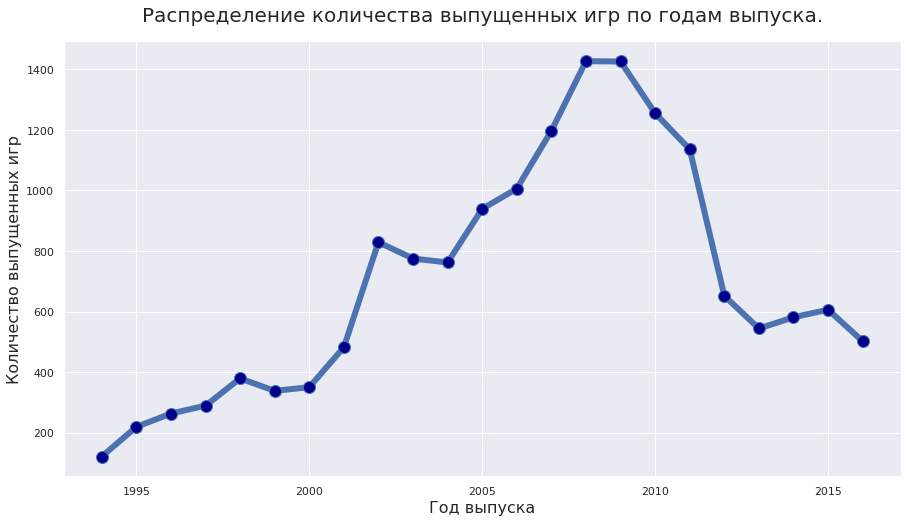

In [21]:
# визуализируем полученные результаты
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,8))
plt.title(
    'Распределение количества выпущенных игр по годам выпуска.',\
    fontsize='20',
    pad=20
)
plt.ylabel('Количество выпущенных игр', fontsize='16')
plt.xlabel('Год выпуска', fontsize='16')

plt.plot(
    data.groupby('year_of_release')['game_name']
    .count(),
    marker='o',
    markerfacecolor='darkblue',
    markersize=12,
    linewidth=6
)
None

### Как изменялись продажи по платформам

In [22]:
# изучим изменение популярности и выручки платформ за разные годы
platform_sales_pivot = data.pivot_table(index='platform', columns='year_of_release', values='all_sales', aggfunc='sum')


In [23]:
# посчитаем, сколько лет продавались игры на каждой из платформ
overall_years = platform_sales_pivot.count(axis=1)

# добавил столбец с суммарной выручкой каждой платформы за весь период
overall_sales = platform_sales_pivot.sum(axis=1)

# перенесём оба столбца в сводную таблицу
platform_sales_pivot['overall_years'] = overall_years
platform_sales_pivot['overall_sales'] = overall_sales


In [24]:
# отсортируем по убыванию
platform_sales_pivot = platform_sales_pivot.sort_values('overall_sales', ascending=False)
platform_sales_pivot

year_of_release,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,overall_years,overall_sales
platform,,,,,,,,,,,,,,,,,,,,,,,,,
ps2,NaN,NaN,NaN,NaN,NaN,NaN,39.17,166.43,205.38,184.31,211.81,160.66,103.42,75.99,53.90,26.40,5.64,0.45,NaN,NaN,NaN,NaN,NaN,12,1233.56
x360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.25,51.62,95.41,135.26,120.29,170.03,143.84,99.74,88.58,34.74,11.96,1.52,12,961.24
ps3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.96,73.19,118.52,130.93,142.17,156.78,107.35,113.25,47.76,16.82,3.60,11,931.33
wii,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137.15,152.77,171.32,206.97,127.95,59.65,21.71,8.59,3.75,1.14,0.18,11,891.18
ds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.27,130.14,119.81,146.94,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN,10,802.76
ps,6.03,35.96,94.70,136.17,169.49,144.53,96.37,35.59,6.67,2.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,727.58
ps4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.99,100.00,118.90,69.25,4,314.14
gba,NaN,NaN,NaN,NaN,NaN,NaN,0.07,61.53,74.16,56.67,77.91,33.86,5.28,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,312.88
psp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.06,43.84,55.32,46.93,34.55,37.78,35.04,17.82,7.69,3.14,0.24,0.12,NaN,12,289.53


In [25]:
platform_sales_pivot['overall_years'].describe()

count    29.000000
mean      6.793103
std       4.813518
min       1.000000
25%       3.000000
50%       6.000000
75%      10.000000
max      23.000000
Name: overall_years, dtype: float64

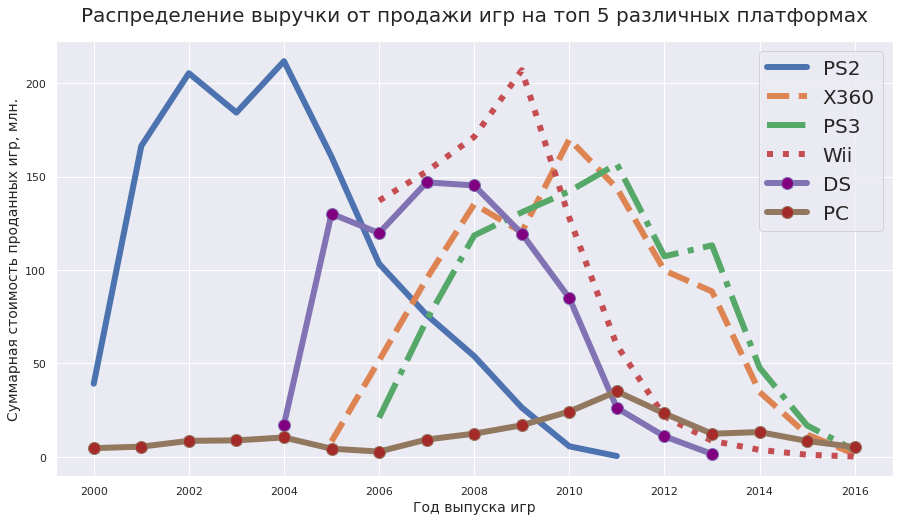

In [26]:
plt.figure(figsize=(15,8))
plt.title(
    'Распределение выручки от продажи игр на топ 5 различных платформах',\
    fontsize='20',
    pad=20
)
plt.ylabel('Суммарная стоимость проданных игр, млн.', fontsize='14')
plt.xlabel('Год выпуска игр', fontsize='14')
sns.set_theme(style="darkgrid")

plt.plot(platform_sales_pivot.loc['ps2',:2016], linewidth=6, label='PS2')
plt.plot(platform_sales_pivot.loc['x360',:2016], linestyle='--', linewidth=6, label='X360')
plt.plot(platform_sales_pivot.loc['ps3',:2016], linestyle='-.', linewidth=6, label='PS3')
plt.plot(platform_sales_pivot.loc['wii',:2016], linestyle=':', linewidth=6, label='Wii')
plt.plot(platform_sales_pivot.loc['ds',:2016], marker='o', markerfacecolor='purple', markersize=12, linewidth=6, label='DS')
plt.plot(platform_sales_pivot.loc['pc',2000:2016], marker='o', markerfacecolor='brown', markersize=12, linewidth=6, label='PC')
plt.legend(fontsize='20')

plt.show()
 

Топ 5 платформ по суммарной выручке с продаж игр - это PS2, X360, PS3, Wii, DS.  
Помимо этого на график была отдельно добавлена выручка для персональных компьютеров (PC), которая исторически является одной из ключевых игровых платформ и которая не пропадает с течением времени.

Построив сводную таблицу для различных платформ и распределения их суммарной выручки от игр за 23 года, мы выяснили, что среднее количество лет выпуска игр для одной платформы на рынке равно приблизительно 6.8 годам со стандартным отклонением 4,8 лет.  
Будем считать актуальным периодом, на основании которого мы будем делать прогнозы на 2017 год - 3 года, не считая текущий 2016 год, так как за этот год данные неполные.

### Возьмем и исследуем данные за актуальный период. Какие платформы растут и падают?

In [27]:
# выделим данные за актуальный период и удалим полностью пустые строки
platform_sales_pivot_2017 = platform_sales_pivot[[2013, 2014, 2015]]
platform_sales_pivot_2017 = platform_sales_pivot_2017.dropna(how='all')
platform_sales_pivot_2017

year_of_release,2013,2014,2015
platform,,,
x360,88.58,34.74,11.96
ps3,113.25,47.76,16.82
wii,8.59,3.75,1.14
ds,1.54,NaN,NaN
ps4,25.99,100.00,118.90
psp,3.14,0.24,0.12
3ds,56.57,43.76,27.78
pc,12.38,13.28,8.52
xone,18.96,54.07,60.14


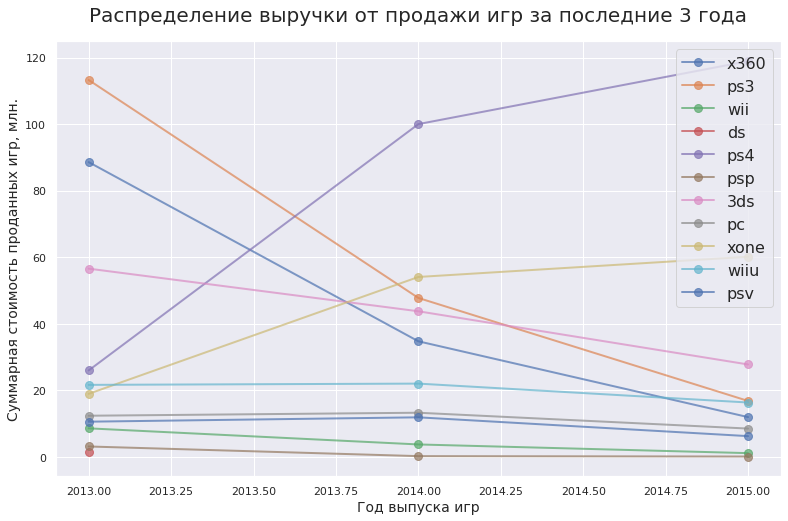

In [28]:
plt.figure(figsize=(13,8))
plt.title(
    'Распределение выручки от продажи игр за последние 3 года',\
    fontsize='20',
    pad=20
)
plt.ylabel('Суммарная стоимость проданных игр, млн.', fontsize='14')
plt.xlabel('Год выпуска игр', fontsize='14')


for i in platform_sales_pivot_2017.index:
    plt.plot(platform_sales_pivot_2017.loc[i,:], marker='o', markersize=8, linewidth=2, label=i, alpha=0.7)
plt.legend(fontsize='16')

plt.show()    

Как мы видим из сводного графика за последние 7 лет, большинство платформ находятся в завершающей фазе цикла своей операционной деятельности и уже "перевалили" пик своей востребованности. 

Из наиболее выделяющихся и перспективных в плане последующего роста являются PS4 и Xone, которые только начали свой путь в 2013 году.  
Также можно отметить платформы 3DS и WiiU. Первая, хоть и показывает падение выручки в течение последних двух лет на момент конца 2015 года всё по-прежнему занимает топ 3 позицию, а вторая хоть и была выпущена сравнительно недавно, но является нишевым продуктом и не ожидает каких-либо значительных скачков в показателях.  

Помимо этого стоит отметить позицию персональных компьютеров (PC), которая не подвержена сменяемости версий и в течение всего рассматриваемого периода показывает стабильный уровень выручки, который постепенно растет.

### Построим графики "ящик с усами" по глобальным продажам игр в разбивке по платформам.

In [30]:
# теперь построим графики «ящик с усами» по глобальным продажам игр в разбивке по платформам за актуальный период

data_actual = (
    data.loc[
        (data['year_of_release'] == 2013) | \
        (data['year_of_release'] == 2014) | \
        (data['year_of_release'] == 2015)]
)


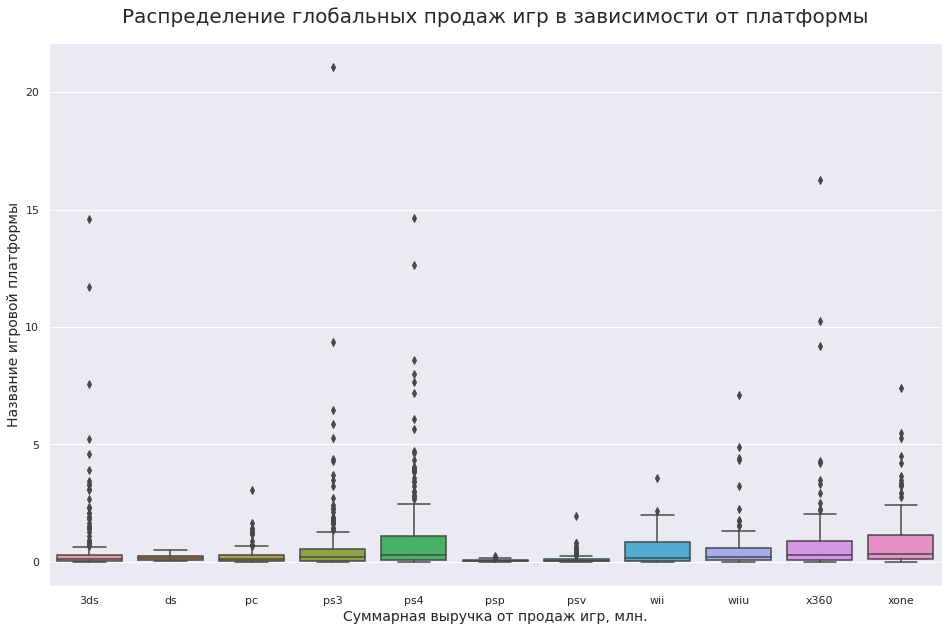

In [31]:
# сначала построим диаграммы размаха на полных данных, с учетом выбросов

plt.figure(figsize=(16,10))
plt.title(
    'Распределение глобальных продаж игр в зависимости от платформы',
    fontsize='20',
    pad=20
)

platform_sales_actual = data_actual.pivot_table(index='game_name', columns='platform', values='all_sales')

sns.boxplot(data=platform_sales_actual)
plt.ylabel('Название игровой платформы', fontsize='14')
plt.xlabel('Суммарная выручка от продаж игр, млн.', fontsize='14')

plt.show()


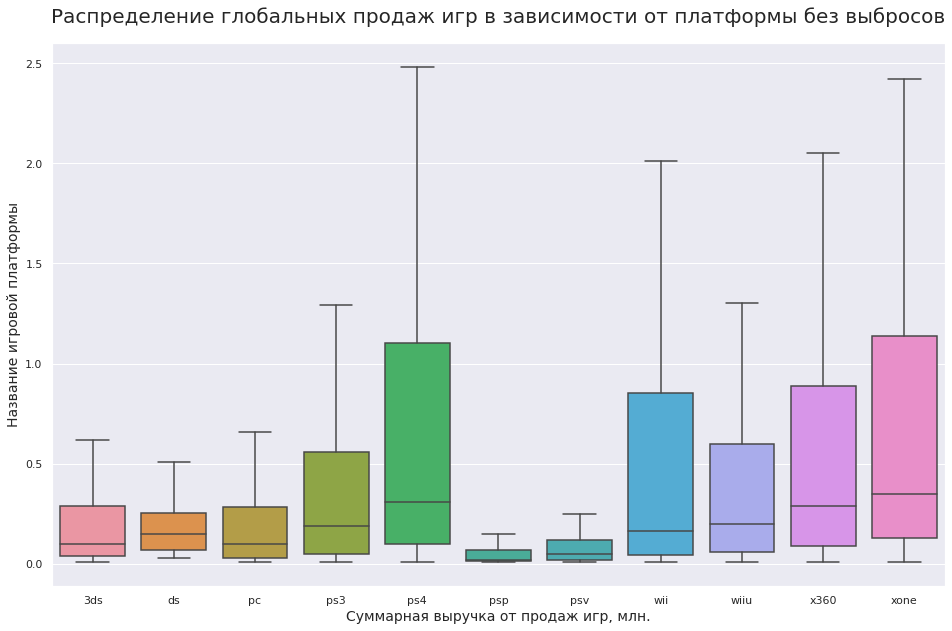

In [32]:
# теперь для построения графика отсечём все значения, которые не попали в интервал Q3 + 1.5IQR

plt.figure(figsize=(16,10))
plt.title(
    'Распределение глобальных продаж игр в зависимости от платформы без выбросов',
    fontsize='20',
    pad=20
)

platform_sales_actual = data_actual.pivot_table(index='game_name', columns='platform', values='all_sales')

sns.boxplot(data=platform_sales_actual, showfliers=False)
plt.ylabel('Название игровой платформы', fontsize='14')
plt.xlabel('Суммарная выручка от продаж игр, млн.', fontsize='14')

plt.show()

In [33]:
data_actual.pivot_table(index='game_name', columns='platform', values='all_sales').count().sum()

1731

In [34]:
data_actual.count()

game_name          1731
platform           1731
year_of_release    1731
genre              1731
na_sales           1731
eu_sales           1731
jp_sales           1731
other_sales        1731
critic_score        759
user_score          930
age_rating         1731
all_sales          1731
dtype: int64

Как мы видим по общему графику, такие платформы как 3DS, PS3, PS4, WiiU, X360, XONE показывают наибольшее количество выбросов, наиболее далёкие из которых у 3DS, PS3, PS4, X360.

График без выбросов показывает, что медиана глобальных продаж игр по большей части платформ находится в пределах 0.3 млн.  
Также верхний разброс Q3 + 1.5IQR практически у всех платформ не выходит за пределы 2.5 млн.

Наибольшие результаты в плане третьего квартиля показали платформы PS4 и Xone, чьи результаты перевалили отметку в 1 миллион.

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 

Для исследования влияния пользовательского рейтинга и рейтинга критиков на продажи внутри платформы, выберем одну из платформ и исследуем имеющиеся данные. Возьмем одну из самых репрезентативных платформ, которая была достаточно современна популярна во времена существования различных рейтинговых аггрегаторов и в то же время, на момент нашего обзора уже практически завершила цикл своего развития - платформа PS3. 

In [35]:
ps3_data = data.loc[
    (data['platform'] == 'ps3') & \
    (data['critic_score'].notna()) & \
    (data['user_score'].notna()),
    ['all_sales', 'critic_score', 'user_score']
]


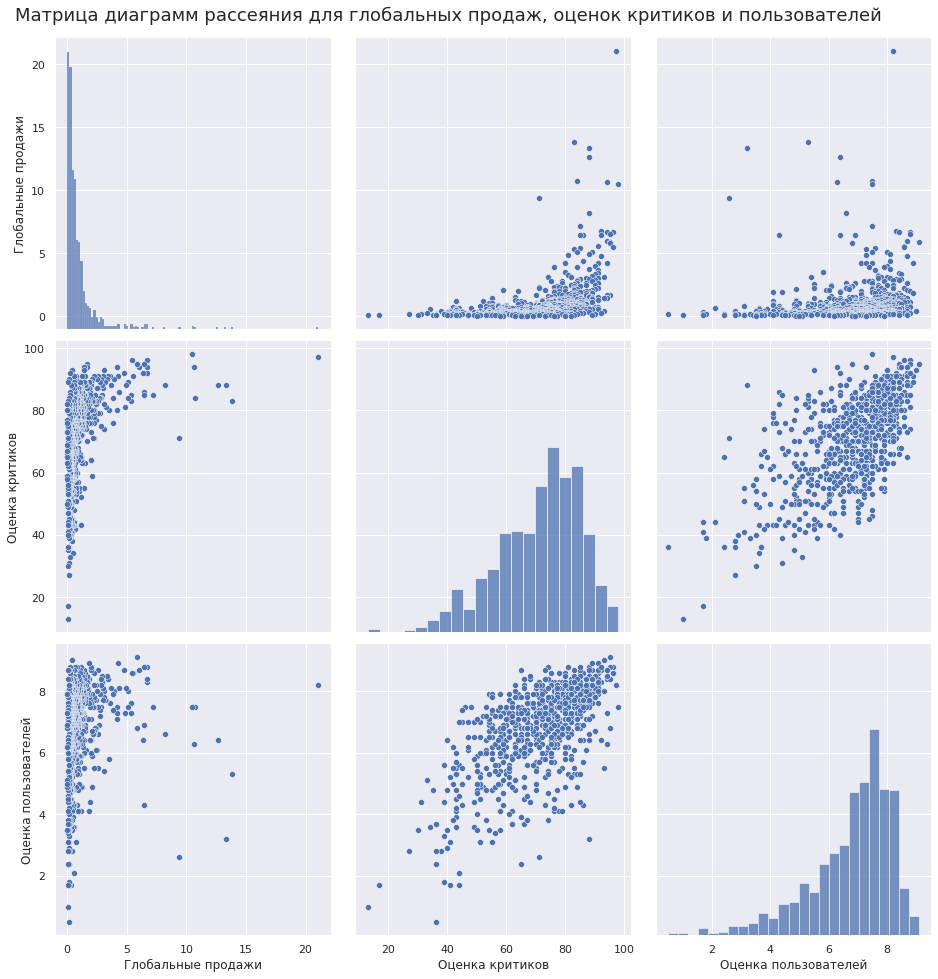

In [36]:
sales_scatter = sns.pairplot(
    ps3_data,
    kind="scatter"
)

sales_scatter.axes[-1,0].yaxis.set_label_text('Оценка пользователей')
sales_scatter.axes[-2,0].yaxis.set_label_text('Оценка критиков')
sales_scatter.axes[-3,0].yaxis.set_label_text('Глобальные продажи')

sales_scatter.axes[-1,0].xaxis.set_label_text('Глобальные продажи')
sales_scatter.axes[-1,1].xaxis.set_label_text('Оценка критиков')
sales_scatter.axes[-1,-1].xaxis.set_label_text('Оценка пользователей')

sales_scatter.fig.suptitle(
    "Матрица диаграмм рассеяния для глобальных продаж, оценок критиков и пользователей",
    y=1.01,
    fontsize=18
)
sales_scatter.fig.set_size_inches(14,14)


plt.show()


Как мы можем видеть из матрицы диаграмм рассеяния и рассчитанных коэффициентов корреляции, мы имеем умеренную положительную корреляцию между глобальными продажами и рейтингом критиков и слабую положительную корреляцию между продажами и пользовательским рейтингом.

Теперь для подтверждения или опровержения этих данных, проверим этот результат на еще нескольких платформах из топ 5.

,all_sales,critic_score,user_score
all_sales,1.0,0.388992,0.11028


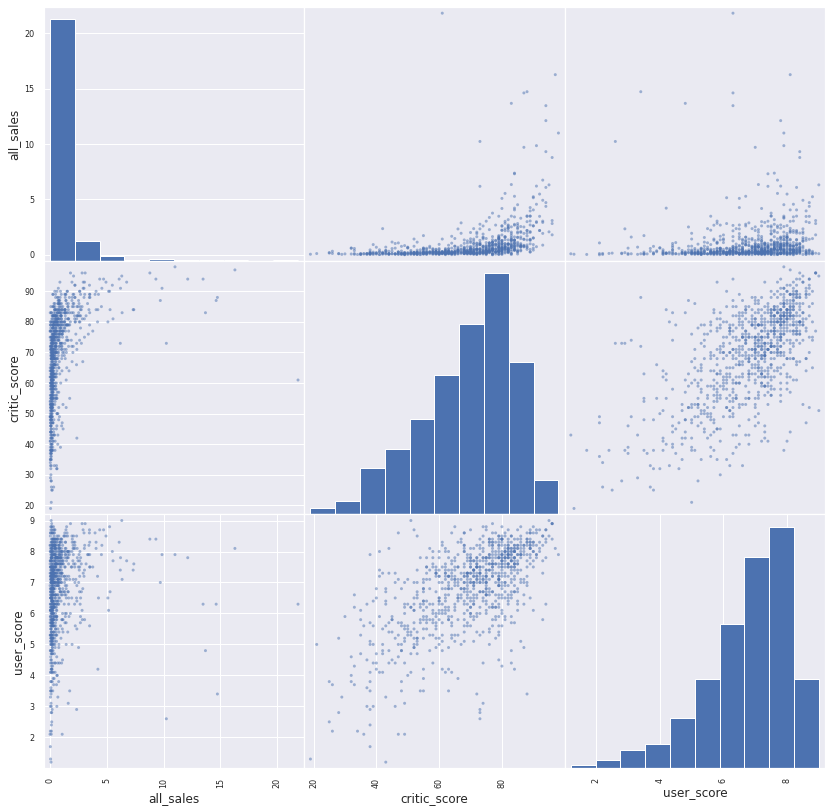

In [37]:
# возьмем Х360
x360_data = data.loc[
    (data['platform'] == 'x360') & \
    (data['critic_score'].notna()) & \
    (data['user_score'].notna()),
    ['all_sales', 'critic_score', 'user_score']
]

pd.plotting.scatter_matrix(x360_data, figsize=(14, 14))

x360_data.corr().head(1)

,all_sales,critic_score,user_score
all_sales,1.0,0.386415,0.17169


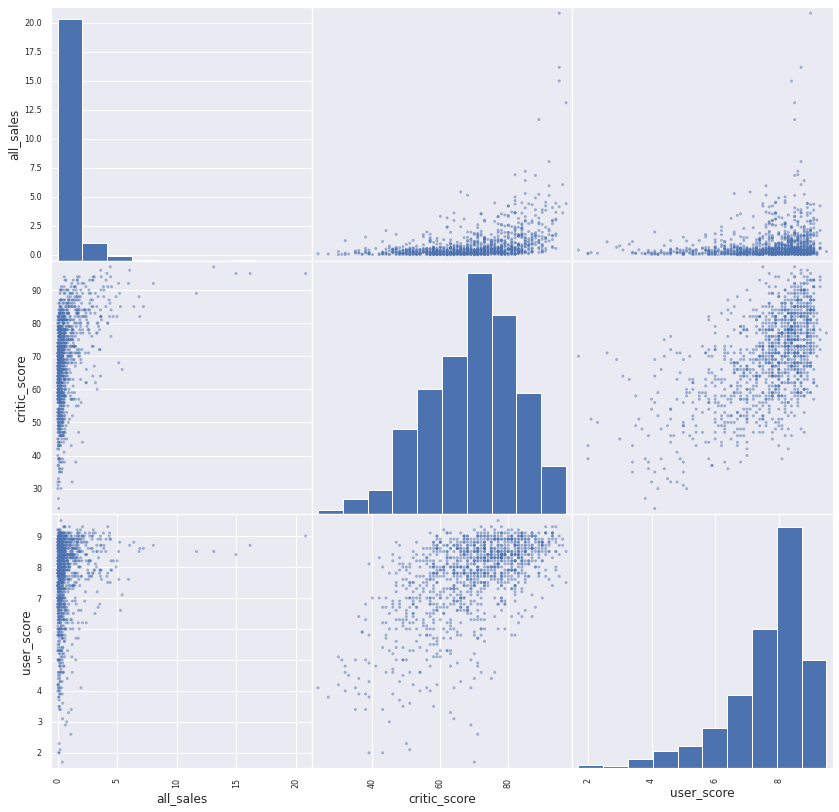

In [38]:
# и проверим также на другой версии PS2
ps2_data = data.loc[
    (data['platform'] == 'ps2') & \
    (data['critic_score'].notna()) & \
    (data['user_score'].notna()),
    ['all_sales', 'critic_score', 'user_score']
]

pd.plotting.scatter_matrix(ps2_data, figsize=(14, 14))

ps2_data.corr().head(1)


,all_sales,critic_score,user_score
all_sales,1.0,0.232258,0.139976


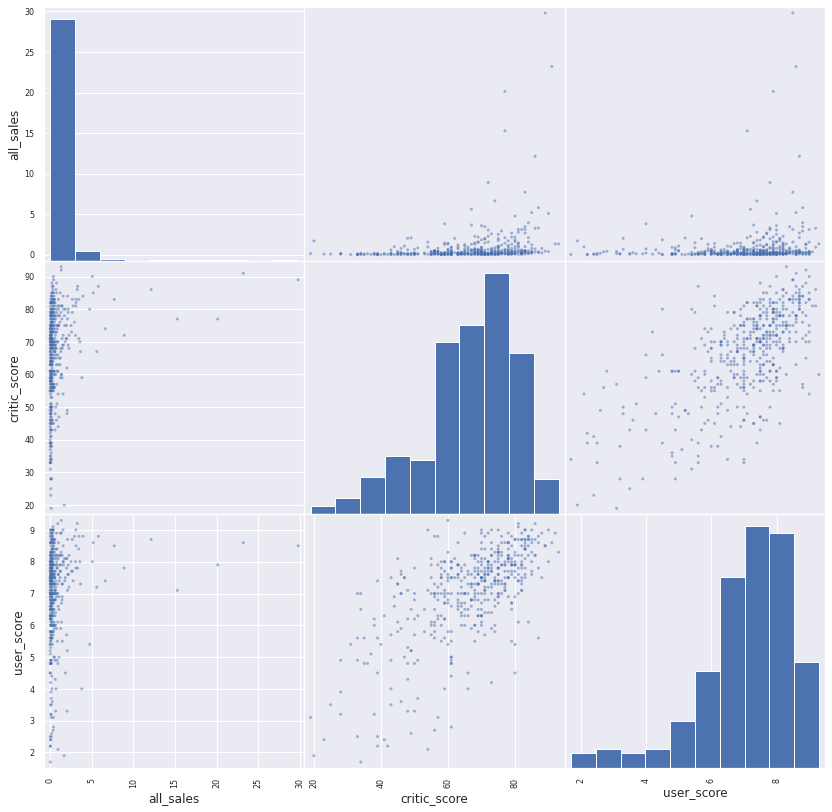

In [39]:
# и напоследок возьмем платформу DS
ds_data = data.loc[
    (data['platform'] == 'ds') & \
    (data['critic_score'].notna()) & \
    (data['user_score'].notna()),
    ['all_sales', 'critic_score', 'user_score']
]

pd.plotting.scatter_matrix(ds_data, figsize=(14, 14))

ds_data.corr().head(1)


Как мы видим, практически на всех платформах кроме последней (DS) сохраняется примерно одна и та же тенденция:
- Умеренная положительная корреляция между глобальными продажами и рейтингом критиков.
- Слабая положительная корреляция между глобальными продажами и рейтингов пользователей.

### Общее распределение игр по жанрам.

Теперь проанализируем общее распределение игр по жанрам. 
- Что можно сказать о самых прибыльных жанрах? 
- Выделяются ли жанры с высокими и низкими продажами?


In [40]:
genre_stat = data_actual.pivot_table(
    index='genre',
    values=['all_sales', 'game_name'],
    aggfunc={
    'all_sales': ['sum', 'median', 'mean'],
    'game_name': 'count'
})

genre_stat.columns = [
    'all_sales_mean',
    'all_sales_median',
    'all_sales_sum',
    'game_count'
]

genre_stat.sort_values(by='all_sales_sum', ascending=False)

,all_sales_mean,all_sales_median,all_sales_sum,game_count
genre,,,,
Action,0.496190,0.130,291.76,588
Shooter,1.391143,0.585,194.76,140
Role-Playing,0.536597,0.130,127.71,238
Sports,0.766024,0.365,127.16,166
Misc,0.489593,0.170,60.22,123
Platform,0.667797,0.310,39.40,59
Racing,0.608197,0.220,37.10,61
Fighting,0.481875,0.130,30.84,64
Simulation,0.451591,0.135,19.87,44


Как мы видим из данной таблицы, наиболее прибыльными жанрами за актуальный период являются Action, Shooter, Role-Playing. Однако, стоит отметить довольно значительные колебания в средних и медианных значениях выручки по жанрам, которые не всегда соотносятся с суммарной выручкой. Также суммарная выручка не всегда коррелирует с количеством выпущенных игр.  
Итого:
- Наиболее прибыльными жанрами за всё время являются Action, Shooter, Role-Playing.
- Наиболее высокая средняя выручка одной игры - в жанрах Shooter, Sports, Platform.
- Наибольшая медианная выручка - в жанрах Shooter, Sports, Platform.
- Наименьшее среднее и медианное значения выручки у жанров Adventure, Puzzle, Strategy.

Теперь построим диаграммы размаха для прибыльности жанров за актуальный период с учетом выбросов и без них.

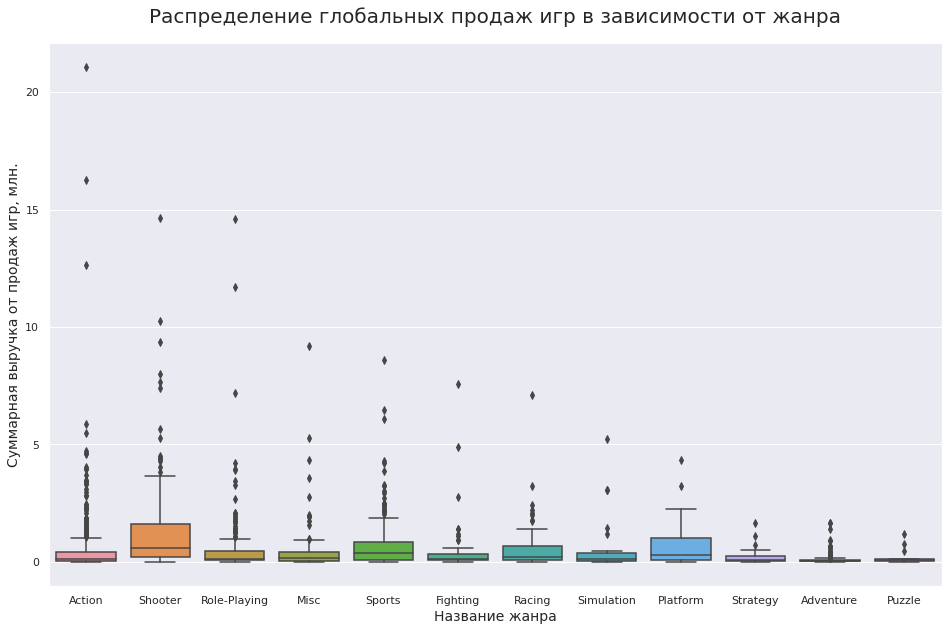

In [41]:
plt.figure(figsize=(16,10))
plt.title(
    'Распределение глобальных продаж игр в зависимости от жанра',
    fontsize='20',
    pad=20
)

sns.boxplot(data=data_actual, x='genre', y='all_sales')
plt.ylabel('Суммарная выручка от продаж игр, млн.', fontsize='14')
plt.xlabel('Название жанра', fontsize='14')

plt.show()

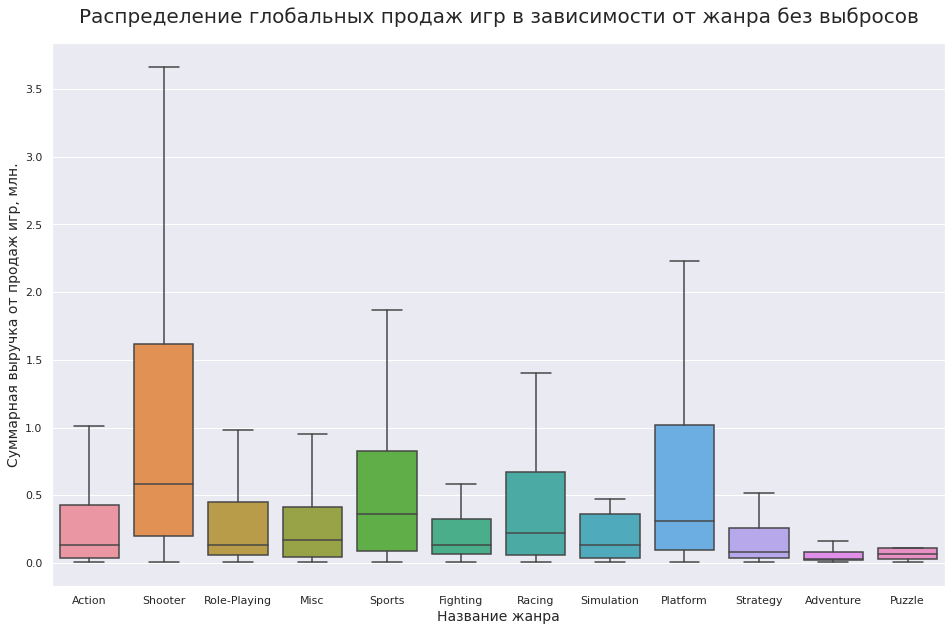

In [42]:
plt.figure(figsize=(16,10))
plt.title(
    'Распределение глобальных продаж игр в зависимости от жанра без выбросов',
    fontsize='20',
    pad=20
)

sns.boxplot(data=data_actual, x='genre', y='all_sales', showfliers=False)
plt.ylabel('Суммарная выручка от продаж игр, млн.', fontsize='14')
plt.xlabel('Название жанра', fontsize='14')

plt.show()

Как мы видим из построенных графиков, наибольшее количество и наиболее сильные выбросы имеются у самых популярных жанров - Action, Shooter, Role-playing.  
Медиана продаж большинства жанров лежит в пределах 0.3 миллионов, за исключением жанра Shooter, где она находится в пределах 0,6 млн.  
Также жанры довольно сильно отличаются по третьему квартилю. Большинство жанров показывает Q3 в пределах 0,5 миллионов. За этот предел выходят Shooter, Sports, Racing и Platform со значительным отрывом у Shooter (~1,6 млн.).  
Наиболее стабильно продаются игры жанра Sports, так как медиана находится приблизительно посередине между Q1 и Q3.

### Промежуточные выводы для данного этапа.

Итак в рамках данного этапа мы исследовали несколько аспектов имеющихся данных. Ниже приведены ключевые выводы.

1. Распределение количества выпущенных игр в разные исторические периоды:
    - В ранние годы развития компьютерных технологий количество выпущенных игр, как и в целом весь этот рынок были довольно ограничены. 
    - Для релевантности данных по годам имеет смысл рассматривать период после 1993 года, когда количество выпущенных за год игр было уже более существенным и сравнимо с показателями последних лет.


2. Как изменялись продажи игр на разных платформах?
    - Топ 5 платформ по суммарной выручке с продаж игр за всё время - это PS2, X360, PS3, Wii, DS.
    - Среднее количество лет выпуска игр для одной платформы на рынке равно приблизительно 6,8. Стандартное отклонение 4,8.
    - Для прогноза на следующий год есть смысл рассматривать только актуальный период - данные за последние 3 года, не включая текущий 2016 год.


3. Какие платформы в актуальном периоде растут, а какие падают?
    - На текущий момент большинство платформ находятся в завершающей фазе цикла своей операционной деятельности и уже "перевалили" за пик своей востребованности. 
    - Из наиболее выделяющихся и перспективных - PS4 и Xone, которые только начали свой путь в 2013 году.  
    - Также можно отметить платформы 3DS и WiiU. 3DS хоть и показывает падение выручку в течение последних двух лет на момент конца 2015 года всё по-прежнему занимает топ 3 позицию. WiiU была выпущена сравнительно недавно, но является нишевым продуктом и не ожидает каких-либо значительных скачков в показателях, тем не менее, продолжает находиться в топ 5 платформ по суммарной выручке.
    - Помимо этого стоит отметить позицию персональных компьютеров (PC), которая не подвержена сменяемости версий и в течение всего рассматриваемого периода показывает стабильный уровень выручки, который постепенно растет.


4. Оценка распределения глобальных продаж игр на различных платформах.
    - Медиана глобальных продаж игр по большей части платформ находится в пределах 0.3 млн.
    - Верхний предел Q3 + 1.5IQR практически у всех платформ не выходит за пределы 2.5 млн.
    - Что касается третьего квартиля наибольшие показатели имеют платформы PS4 и Xone, чьи результаты перевалили отметку в 1 миллион.


5. Влияние на продажи оценок критиков и пользователей.  
На большинстве самых популярных платформ сохраняется примерно одна и та же тенденция:
    - Умеренная положительная корреляция между глобальными продажами и рейтингом критиков.
    - Слабая положительная корреляция между глобальными продажами и рейтингов пользователей.


6. Общее распределение игр по жанрам.
    - Наиболее прибыльными жанрами за всё время являются Action, Shooter, Role-Playing.
    - Наиболее высокая средняя выручка одной игры - в жанрах Shooter, Sports, Platform.
    - Наибольшая медианная выручка - в жанрах Shooter, Sports, Platform.
    - Наименьшее среднее и медианное значения выручки у жанров Adventure, Puzzle, Strategy.

## Портрет пользователя каждого региона.

В данном разделе мы изучим портрет пользователей из разных регионов.  
Для каждого региона мы проверим:
- Самые популярные платформы (топ-5).
- Самые популярные жанры (топ-5).
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Самые популярные платформы по регионам.

In [43]:
# найдем суммарные продажи различных платформ по регионам
region_list = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
region_platform = data_actual.groupby('platform')[region_list].agg('sum')
region_platform.reset_index(inplace=True)
region_platform

,platform,na_sales,eu_sales,jp_sales,other_sales
0,3ds,34.06,28.63,59.78,5.64
1,ds,0.57,0.85,0.00,0.12
2,pc,9.75,21.83,0.00,2.60
3,ps3,62.83,66.55,22.05,26.40
4,ps4,87.25,109.31,10.22,38.11
5,psp,0.00,0.17,3.29,0.04
6,psv,4.89,5.71,15.03,3.11
7,wii,6.50,5.82,0.05,1.11
8,wiiu,27.11,18.37,10.21,4.34
9,x360,80.97,41.81,0.51,11.99


In [44]:
# для каждого региона все платформы кроме топ-5 просуммируем и назовём other
other_sum = []
for i in region_list:

    # сортируем таблицу по продажам в регионе и сбрасываем индексы
    region_platform = (
        region_platform
        .sort_values(by=i, ascending=False)
        .reset_index(drop=True)
    )

    # суммируем выручку платформ вне топ-5 и записываем в новую строку
    a = region_platform.loc[5:,i].sum(axis=0)
    other_sum.append(a)
    
    # удаляем данные о платформах не из топ-5
    region_platform.loc[5:,i] = np.nan

# добавляем эту строку к датафрейму    
other_sum.insert(0, 'other')
region_platform.loc[len(region_platform)] = other_sum
region_platform

,platform,na_sales,eu_sales,jp_sales,other_sales
0,ps4,87.25,109.31,10.22,38.11
1,ps3,62.83,66.55,22.05,26.40
2,xone,78.85,41.96,NaN,12.03
3,x360,80.97,41.81,NaN,11.99
4,3ds,34.06,28.63,59.78,5.64
5,wiiu,NaN,NaN,10.21,NaN
6,psv,NaN,NaN,15.03,NaN
7,pc,NaN,NaN,NaN,NaN
8,wii,NaN,NaN,NaN,NaN
9,ds,NaN,NaN,NaN,NaN


In [45]:
# найдем региональную долю продаж для каждой платформы
for i in region_list:
    region_platform[i + '_share'] = round((region_platform[i] / region_platform[i].sum()), 3)
    
region_platform

,platform,na_sales,eu_sales,jp_sales,other_sales,na_sales_share,eu_sales_share,jp_sales_share,other_sales_share
0,ps4,87.25,109.31,10.22,38.11,0.222,0.321,0.084,0.361
1,ps3,62.83,66.55,22.05,26.40,0.160,0.195,0.182,0.250
2,xone,78.85,41.96,NaN,12.03,0.201,0.123,NaN,0.114
3,x360,80.97,41.81,NaN,11.99,0.206,0.123,NaN,0.114
4,3ds,34.06,28.63,59.78,5.64,0.087,0.084,0.492,0.053
5,wiiu,NaN,NaN,10.21,NaN,NaN,NaN,0.084,NaN
6,psv,NaN,NaN,15.03,NaN,NaN,NaN,0.124,NaN
7,pc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,wii,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,ds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# посмотрим на получившиеся таблицы
for i in region_platform.columns:
    if i == 'platform':
        continue
    if i == 'na_sales_share':
        break
    
    print('Сортировка продаж по региону', i)
    
    display(
        region_platform[['platform', i, i + '_share']]
        .sort_values(by=i, ascending=False)
        .head(6)
    )

Сортировка продаж по региону na_sales


,platform,na_sales,na_sales_share
0,ps4,87.25,0.222
3,x360,80.97,0.206
2,xone,78.85,0.201
1,ps3,62.83,0.160
11,other,48.82,0.124
4,3ds,34.06,0.087


Сортировка продаж по региону eu_sales


,platform,eu_sales,eu_sales_share
0,ps4,109.31,0.321
1,ps3,66.55,0.195
11,other,52.75,0.155
2,xone,41.96,0.123
3,x360,41.81,0.123
4,3ds,28.63,0.084


Сортировка продаж по региону jp_sales


,platform,jp_sales,jp_sales_share
4,3ds,59.78,0.492
1,ps3,22.05,0.182
6,psv,15.03,0.124
0,ps4,10.22,0.084
5,wiiu,10.21,0.084
11,other,4.18,0.034


Сортировка продаж по региону other_sales


,platform,other_sales,other_sales_share
0,ps4,38.11,0.361
1,ps3,26.40,0.250
2,xone,12.03,0.114
3,x360,11.99,0.114
11,other,11.32,0.107
4,3ds,5.64,0.053


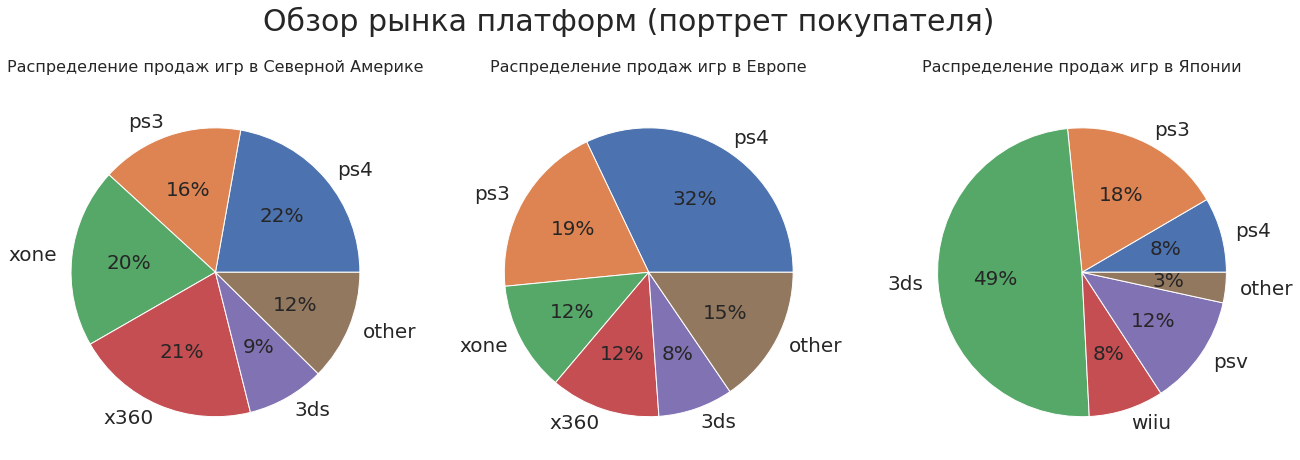

In [47]:
# теперь визуализируем полученные результаты
plt.figure(figsize=(22, 22))
plt.suptitle('Обзор рынка платформ (портрет покупателя)', fontsize=30, y=0.67)

# график для Северной Америки
ax1 = plt.subplot(1, 3, 1)

plt.title(
    'Распределение продаж игр в Северной Америке',
    fontsize='16',
    pad=20
)

a = region_platform.loc[region_platform['na_sales_share'].notna()]

ax1.pie(
    a['na_sales_share'],
    labels=a['platform'],
    autopct='%1.0f%%',
    textprops={'fontsize':20},
)


# график для Европы
ax2 = plt.subplot(1, 3, 2)
plt.title(
    'Распределение продаж игр в Европе',
    fontsize='16',
    pad=20
)

a = region_platform.loc[region_platform['eu_sales_share'].notna()]

ax2.pie(
    a['eu_sales_share'],
    labels=a['platform'],
    autopct='%1.0f%%',
    textprops={'fontsize':20}
)

# график для Японии
ax3 = plt.subplot(1, 3, 3)
plt.title(
    'Распределение продаж игр в Японии',
    fontsize='16',
    pad=20
)

a = region_platform.loc[region_platform['jp_sales_share'].notna()]

ax3.pie(
    a['jp_sales_share'],
    labels=a['platform'],
    autopct='%1.0f%%',
    textprops={'fontsize':20}
)

plt.show()


При группировке продаж и долей занимаемого рынка самых популярных платформ по регионам за актуальный период мы получили:
- В Северной Америке - PS4(22%), X360(21%), XOne(20%), PS3(16%), 3DS(9%), Other(12%.
- В Европе - PS4(32%), PS3(19%), X360(12%), XOne(12%), 3DS(8%), Other(15%).
- В Японии - 3DS(49%), PS3(18%), PSV(12%), WiiU(8%), PS4(8%), Other(3%.
- В других регионах - PS4(36%), PS3(25%), XOne(12%), X360(12%), Wii(10%), 3DS(1%), Other(11%).

Как мы видим, в большинстве регионов список топ 5 платформ по количеству продаж практически не отличается, за исключением рынка Японии. В списке лидеров находятся PS4, X360, XOne, PS3. Также довольно существенна доля других платформ - до 15% рынка.

В Японии доминирует платформа 3DS, за ней идут PS3, PSV, PS4, WiiU. Доля других платформ здесь сравнительно невелика - всего лишь 3%.


### Самые популярные жанры.

In [48]:
region_genre = data_actual.groupby('genre')[region_list].agg('sum')

# найдем региональную долю продаж для каждого жанра
for i in region_list:
    region_genre[i + '_share'] = round((region_genre[i] / region_genre[i].sum()), 2)

for i in region_genre.columns:
    if i == 'na_sales_share':
        break
        
    print('Сортировка жанров по региону', i)
    
    display(
        region_genre[[i, i + '_share']]
        .sort_values(by=i, ascending=False)
        .head()
    )
    

Сортировка жанров по региону na_sales


,na_sales,na_sales_share
genre,,
Action,116.76,0.30
Shooter,93.50,0.24
Sports,57.73,0.15
Role-Playing,40.51,0.10
Misc,26.73,0.07


Сортировка жанров по региону eu_sales


,eu_sales,eu_sales_share
genre,,
Action,107.45,0.32
Shooter,71.96,0.21
Sports,48.51,0.14
Role-Playing,32.69,0.10
Misc,19.38,0.06


Сортировка жанров по региону jp_sales


,jp_sales,jp_sales_share
genre,,
Role-Playing,44.43,0.37
Action,33.42,0.28
Misc,8.16,0.07
Fighting,6.90,0.06
Shooter,5.55,0.05


Сортировка жанров по региону other_sales


,other_sales,other_sales_share
genre,,
Action,34.13,0.32
Shooter,23.75,0.23
Sports,16.43,0.16
Role-Playing,10.08,0.10
Misc,5.95,0.06


При группировке по жанрам и регионам мы получили самые популярные жанры и соответствующие доли рынка:  
- В Северной Америке : Action(30%), Shooter(24%), Sports(15%),  Role-Playing(10%), Misc(7%). 
- В Европе - Action(32%), Sports(14%), Shooter(21%), Role-Playing(10%), Misc(7%).
- В Японии - Role-Playing(37%), Action(28%), Misc(9%), Fighting(6%), Shooter(5%).
- В других регионах - Action(32%), Shooter(23%), Sports(16%), Role-Playing(10%), Misc(6%).

Как и в предыдущем пункте, большинство регионов ведут себя примерно одинаково, кроме региона Японии, который снова демонстрирует свою самобытность. На этот раз во всех регионах кроме Японии список топ 5 жанров отличается лишь незначительными перестановками и колебаниями в процентах рынка. Наиболее распространенным жанром в мире остаётся Action, 2-3 позиции делят Shooter и Sports.  
В Японии на первом месте стоит жанр, который занимает лишь 4-5 позиции в других регионах - Role-Playing. Также на японском рынке в топ 5 смог попасть жанр Fighting, который также не представлен ни в одном из других регионов.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [49]:
region_age_rating = (
    data_actual
    .groupby('age_rating')[region_list]
    .agg('sum')
)

# найдем региональную долю продаж для каждого рейтинга
for i in region_list:
    region_age_rating[i + '_share'] = round((region_age_rating[i] / region_age_rating[i].sum()), 2)

for i in region_genre.columns:
    if i == 'na_sales_share':
        break
        
    print('Сортировка возрастного рейтинга по региону', i)
    
    display(
        region_age_rating[[i, i + '_share']]
        .sort_values(by=i, ascending=False)
        .head()
    )


Сортировка возрастного рейтинга по региону na_sales


,na_sales,na_sales_share
age_rating,,
M,149.54,0.38
UNK,80.89,0.21
E,71.08,0.18
E10+,50.43,0.13
T,40.84,0.10


Сортировка возрастного рейтинга по региону eu_sales


,eu_sales,eu_sales_share
age_rating,,
M,128.78,0.38
UNK,71.44,0.21
E,69.75,0.20
E10+,38.88,0.11
T,32.16,0.09


Сортировка возрастного рейтинга по региону jp_sales


,jp_sales,jp_sales_share
age_rating,,
UNK,70.73,0.58
T,18.32,0.15
E,14.07,0.12
M,12.91,0.11
E10+,5.44,0.04


Сортировка возрастного рейтинга по региону other_sales


,other_sales,other_sales_share
age_rating,,
M,42.10,0.40
UNK,21.18,0.20
E,19.52,0.19
E10+,11.51,0.11
T,11.18,0.11


Как мы видим из сгруппированных данных, практически во всех регионах доминируют игры с рейтингом E (Everyone), доступные для любых возрастов, кроме рынка Японии.  На второй позиции в Северной Америке и Европе расположились игры без какого-либо рейтинга. Вероятно, это связано с тем, что далеко не все игры получают какой-либо профессиональный рейтинг ввиду их общего количества.
2-3 позиции делят рейтинг M (Mature, 17+) и T (Teen, 13+). Во всех регионах кроме Японии эти два рейтинга имеются примерно одинаковую долю рынка. 

Рынок Японии отличается тем, что наибольшую часть продаж (~60%) составляют игры без какого-либо рейтинга. Возможно, это связано с тем, что в Японии преобладают собственные игры местных разработчиков, которые не получают оценку от западных рейтинговых агенств, из которых скорее всего получен данный датасет. 
Также в Японии рейтинг T более чем в два раза опережает M, что говорит о большой прослойке тинейджеров, играющих в игры. 

Наименее представленные в таблицах рейтинги - AO (Adults only, 18+) и EC (Early Childhood, 3-6 лет). 

### Промежуточные выводы по данному этапу.

1. Самые популярные платформы по регионам и доли занимаемого рынка:
    - В Северной Америке - PS4(22%), X360(21%), XOne(20%), PS3(16%), 3DS(9%), Other(12%.
    - В Европе - PS4(32%), PS3(19%), X360(12%), XOne(12%), 3DS(8%), Other(15%).
    - В Японии - 3DS(49%), PS3(18%), PSV(12%), WiiU(8%), PS4(8%), Other(3%.
    - В других регионах - PS4(36%), PS3(25%), XOne(12%), X360(12%), Wii(10%), 3DS(1%), Other(11%).

Как мы видим, в большинстве регионов список топ 5 платформ по количеству продаж практически не отличается, за исключением рынка Японии. В списке лидеров находятся PS4, X360, XOne, PS3. Также довольно существенна доля других платформ - до 15% рынка.

В Японии доминирует платформа 3DS, за ней идут PS3, PSV, PS4, WiiU. Доля других платформ здесь сравнительно невелика - всего лишь 3%.   


2. Самые популярные жанры в различных регионах и их доли рынка:
При группировке по жанрам и регионам мы получили самые популярные жанры и соответствующие доли рынка:  
    - В Северной Америке : Action(30%), Shooter(24%), Sports(15%),  Role-Playing(10%), Misc(7%). 
    - В Европе - Action(32%), Sports(14%), Shooter(21%), Role-Playing(10%), Misc(7%).
    - В Японии - Role-Playing(37%), Action(28%), Misc(9%), Fighting(6%), Shooter(5%).
    - В других регионах - Action(32%), Shooter(23%), Sports(16%), Role-Playing(10%), Misc(6%).

Как и в предыдущем пункте, большинство регионов ведут себя примерно одинаково, кроме региона Японии, который снова демонстрирует свою самобытность. На этот раз во всех регионах кроме Японии список топ 5 жанров отличается лишь незначительными перестановками и колебаниями в процентах рынка. Наиболее распространенным жанром в мире остаётся Action, 2-3 позиции делят Shooter и Sports.  
В Японии на первом месте стоит жанр, который занимает лишь 4-5 позиции в других регионах - Role-Playing. Также на японском рынке в топ 5 смог попасть жанр Fighting, который также не представлен ни в одном из других регионов. 


3. Влияет ли рейтинг ESRB на продаже в различных регионах?
    - Во всех регионах кроме рынка Японии доминируют игры с рейтингом E (Everyone), доступные для любых возрастов.
    - На второй позиции в Северной Америке и Европе расположились игры без какого-либо рейтинга. Вероятно, это связано с тем, что далеко не все игры получают какой-либо профессиональный рейтинг ввиду их общего количества.
    - 2-3 позиции делят рейтинг M (Mature, 17+) и T (Teen, 13+). Во всех регионах кроме Японии эти два рейтинга имеются примерно одинаковую долю рынка. 
    - Рынок Японии отличается тем, что наибольшую часть продаж (~60%) составляют игры без какого-либо рейтинга. Возможно, это связано со спецификой Японии, где преобладают собственные игры местных разработчиков, которые не получают оценку от западных рейтинговых агенств, из которых скорее всего получен данный датасет. 
    - Также в Японии рейтинг T более чем в два раза опережает M, что говорит о большой прослойке тинейджеров, играющих в игры. 
    - Наименее представленные в таблицах рейтинги - AO (Adults only, 18+) и EC (Early Childhood, 3-6 лет). 

## Проверка гипотез

На данном этапе нам предстоит проверить две основных гипотезы на имеющихся данных:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Начнём проверку гипотез по порядку. Для обеих гипотез возьмем уровень значимости, равный 5%.

In [50]:
alpha = 0.05

### Гипотеза о равнозначности пользовательских рейтингов на платформах Xbox One и PC. 

Обозначим нулевую гипотезу:
- Средние пользовательские рейтинги платформ Xbox One и PC равны.

Альтернативная гипотеза:
- Средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [51]:
xone_user_score = data.loc[data['platform'] == 'xone', 'user_score'].dropna()
pc_user_score = data.loc[(data['platform'] == 'pc') & (data['year_of_release'] >= 2013), 'user_score'].dropna()

In [52]:
# используем t-test для двух независимых совокупностей и двухсторонней гипотезы
results = st.ttest_ind(xone_user_score, pc_user_score)
# у нас нет оснований полагать, что дисперсии двух совокупностей значимо отличаются
# поэтому параметр equal_var оставим по умолчанию True

print('Среднее значение пользовательского рейтинга на платформе Xbox One:', xone_user_score.mean())
print('Среднее значение пользовательского рейтинга на платформе PC:', pc_user_score.mean())
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 


Среднее значение пользовательского рейтинга на платформе Xbox One: 6.521428571428572
Среднее значение пользовательского рейтинга на платформе PC: 6.2696774193548395
p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


На основании полученных результатов мы можем сделать вывод о том, что с 5% уровнем значимости мы не можем отвергнуть нашу нулевую гипотезу в пользу альтернативной. Средние пользовательские рейтинги платформ Xbox One и PC статистически значимо равны.

In [53]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


### Гипотеза о неравнозначности пользовательских рейтингов жанров Action и Sports.

Обозначим нулевую гипотезу:
- Средние пользовательские рейтинги жанров Action и Sports равны.

Альтернативная гипотеза:
- Средние пользовательские рейтинги жанров Action и Sports не равны.

In [54]:
action_score = data.loc[data['genre'] == 'Action', 'user_score'].dropna()
sports_score = data.loc[data['genre'] == 'Sports', 'user_score'].dropna()

In [55]:
# используем t-test для двух независимых совокупностей и двухсторонней гипотезы
results = st.ttest_ind(action_score, sports_score)
# у нас нет оснований полагать, что дисперсии двух совокупностей значимо отличаются, поэтому параметр equal_var оставим по умолчанию True

print('Среднее значение пользовательского рейтинга для жанра Action:', action_score.mean())
print('Среднее значение пользовательского рейтинга для жанра Sports:', sports_score.mean())
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Среднее значение пользовательского рейтинга для жанра Action: 7.058129175946549
Среднее значение пользовательского рейтинга для жанра Sports: 6.9527777777777775
p-значение: 0.06833686503882228
Не получилось отвергнуть нулевую гипотезу


Можем констатировать, что с 5% уровнем значимости мы не можем отвергнуть нулевую гипотезу. Соответственно, гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports равны, устояла.

## Общий вывод.

В данном проекте мы исследовали данные интернет-магазина игр "Стримчик". Задачами проекта являлись предобработка данных, исследование закономерностей, изучение портера пользователей каждого региона и проверка нескольких гипотез.

**Предобработка данных.**
- Скорректировали назчания столбцов и привели в соответствие со snake_case;
- Проверили таблицу на наличие явных и неявных дубликатов. Таковым в таблице не было;
- Проверили наличие пропусков в столбцах таблицы. Всего таких столбцов было 6. В столбцах game_name, year_of_release, genre, ввиду незначительного количества пустых значений, соответствующие строки были удалены из таблицы. В оставшихся столбцах critic_score, user_score, age_rating пропуски не могли быть заменены на какие-либо значения, поэтому были оставлены без изменений, либо заменены на 'UNK' (столбец age_rating).
- Изменили тип данных в столбцах year_of_release и user_score на int и float соответственно, чтобы отразить суть содержащихся в них данных.
- Посчитали суммарные продажи во всех регионах и записать это в отдельный столбец таблицы all_sales.

**Исследовательский анализ данных:**
1. Распределение количества выпущенных игр в разные исторические периоды:
    - В ранние годы развития компьютерных технологий количество выпущенных игр, как и в целом весь этот рынок были довольно ограничены. 
    - Для релевантности данных по годам имеет смысл рассматривать период после 1993 года, когда количество выпущенных за год игр было уже более существенным и сравнимо с показателями последних лет.


2. Как изменялись продажи игр на разных платформах?
    - Топ 5 платформ по суммарной выручке с продаж игр за всё время - это PS2, X360, PS3, Wii, DS.
    - Среднее количество лет выпуска игр для одной платформы на рынке равно приблизительно 6,8. Стандартное отклонение 4,8.
    - Для прогноза на следующий год есть смысл рассматривать только актуальный период - данные за последние 3 года, не включая текущий 2016 год.


3. Какие платформы в актуальном периоде растут, а какие падают?
    - На текущий момент большинство платформ находятся в завершающей фазе цикла своей операционной деятельности и уже "перевалили" за пик своей востребованности. 
    - Из наиболее выделяющихся и перспективных - PS4 и Xone, которые только начали свой путь в 2013 году.  
    - Также можно отметить платформы 3DS и WiiU. 3DS хоть и показывает падение выручку в течение последних двух лет на момент конца 2015 года всё по-прежнему занимает топ 3 позицию. WiiU была выпущена сравнительно недавно, но является нишевым продуктом и не ожидает каких-либо значительных скачков в показателях, тем не менее, продолжает находиться в топ 5 платформ по суммарной выручке.


4. Оценка распределения глобальных продаж игр на различных платформах за актуальный период.
    - Медиана глобальных продаж игр по большей части платформ находится в пределах 0.3 млн.
    - Верхний предел Q3 + 1.5IQR практически у всех платформ не выходит за пределы 2.5 млн.
    - Что касается третьего квартиля наибольшие показатели имеют платформы PS4 и Xone, чьи результаты перевалили отметку в 1 миллион.


5. Влияние на продажи оценок критиков и пользователей.  
На большинстве самых популярных платформ сохраняется примерно одна и та же тенденция:
    - Умеренная положительная корреляция между глобальными продажами и рейтингом критиков.
    - Слабая положительная корреляция между глобальными продажами и рейтингов пользователей.


6. Общее распределение игр по жанрам.
    - Наиболее прибыльными жанрами за всё время являются Action, Shooter, Role-Playing.
    - Наиболее высокая средняя выручка одной игры - в жанрах Shooter, Sports, Platform.
    - Наибольшая медианная выручка - в жанрах Shooter, Sports, Platform.
    - Наименьшее среднее и медианное значения выручки у жанров Adventure, Puzzle, Strategy.

**Изучение портрета пользователя для каждого из регионов.**

1. Самые популярные платформы по регионам и доли занимаемого рынка:
    - В Северной Америке - PS4(22%), X360(21%), XOne(20%), PS3(16%), 3DS(9%), Other(12%.
    - В Европе - PS4(32%), PS3(19%), X360(12%), XOne(12%), 3DS(8%), Other(15%).
    - В Японии - 3DS(49%), PS3(18%), PSV(12%), WiiU(8%), PS4(8%), Other(3%.
    - В других регионах - PS4(36%), PS3(25%), XOne(12%), X360(12%), Wii(10%), 3DS(1%), Other(11%).

Как мы видим, в большинстве регионов список топ 5 платформ по количеству продаж практически не отличается, за исключением рынка Японии. В списке лидеров находятся PS4, X360, XOne, PS3. Также довольно существенна доля других платформ - до 15% рынка.

В Японии доминирует платформа 3DS, за ней идут PS3, PSV, PS4, WiiU. Доля других платформ здесь сравнительно невелика - всего лишь 3%. 


2. Самые популярные жанры в различных регионах и их доли рынка:
    - В Северной Америке : Action(30%), Shooter(24%), Sports(15%),  Role-Playing(10%), Misc(7%). 
    - В Европе - Action(32%), Sports(14%), Shooter(21%), Role-Playing(10%), Misc(7%).
    - В Японии - Role-Playing(37%), Action(28%), Misc(9%), Fighting(6%), Shooter(5%).
    - В других регионах - Action(32%), Shooter(23%), Sports(16%), Role-Playing(10%), Misc(6%).

Как и в предыдущем пункте, большинство регионов ведут себя примерно одинаково, кроме региона Японии, который снова демонстрирует свою самобытность. На этот раз во всех регионах кроме Японии список топ 5 жанров отличается лишь незначительными перестановками и колебаниями в процентах рынка. Наиболее распространенным жанром в мире остаётся Action, 2-3 позиции делят Shooter и Sports.  
В Японии на первом месте стоит жанр, который занимает лишь 4-5 позиции в других регионах - Role-Playing. Также на японском рынке в топ 5 смог попасть жанр Fighting, который также не представлен ни в одном из других регионов. 


3. Влияет ли рейтинг ESRB на продаже в различных регионах?
    - Во всех регионах кроме рынка Японии доминируют игры с рейтингом E (Everyone), доступные для любых возрастов.
    - На второй позиции в Северной Америке и Европе расположились игры без какого-либо рейтинга. Вероятно, это связано с тем, что далеко не все игры получают какой-либо профессиональный рейтинг ввиду их общего количества.
    - 2-3 позиции делят рейтинг M (Mature, 17+) и T (Teen, 13+). Во всех регионах кроме Японии эти два рейтинга имеются примерно одинаковую долю рынка. 
    - Рынок Японии отличается тем, что наибольшую часть продаж (~60%) составляют игры без какого-либо рейтинга. Возможно, это связано со спецификой Японии, где преобладают собственные игры местных разработчиков, которые не получают оценку от западных рейтинговых агенств, из которых скорее всего получен данный датасет. 
    - Также в Японии рейтинг T более чем в два раза опережает M, что говорит о большой прослойке тинейджеров, играющих в игры. 
    - Наименее представленные в таблицах рейтинги - AO (Adults only, 18+) и EC (Early Childhood, 3-6 лет). 

**Проверка гипотез.**
- С 5% уровнем значимости средние пользовательские рейтинги платформ Xbox One и PC статистически равны.
- С 5% уровнем значимости средние пользовательские рейтинги жанров Action и Sports равны.



**Итого:**  
Задачи проекта выполнены, а цели достигнуты.